<a href="https://colab.research.google.com/github/bcguilherme/arquivos-legais/blob/main/commodities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pmdarima.arima import auto_arima
from ipywidgets import interact, widget
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
df=pd\
.read_csv\
("/Users/chenyenpin/Downloads/Datasets/monthly.csv", parse_dates=["Month"], index_col=["Month"])

df.head()


,Unnamed: 0,Price
Month,,
2000-01-01,36,2.42
2000-02-01,37,2.66
2000-03-01,38,2.79
2000-04-01,39,3.04
2000-05-01,40,3.59


In [ ]:
df=df.drop("Unnamed: 0", axis=1)


In [ ]:
df.shape

(248, 1)

In [ ]:
df.describe(percentiles=[.01, .1, .25, .5, .75, .99]).T


,count,mean,std,min,1%,10%,25%,50%,75%,99%,max
Price,248.0,4.486774,2.19639,1.63,1.7447,2.34,2.8775,3.905,5.8125,12.2482,13.42


In [ ]:
df.isna().sum()

Price    0
dtype: int64

In [ ]:
@interact(windowsize=(3,200,3))
def rolling_mean(windowsize):
    plt.figure(figsize=(18,7))
    df.rolling(windowsize).mean().plot()
    plt.title("Variacao preco x tempo")
    plt.show()

interactive(children=(IntSlider(value=99, description='windowsize', max=200, min=3, step=3), Output()), _dom_c…

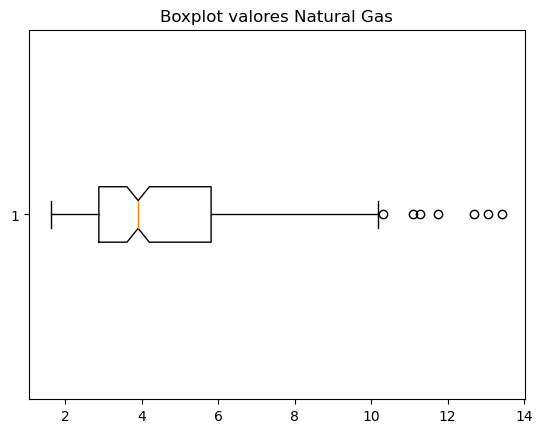

In [ ]:
plt.boxplot(df, notch=True, vert=False)
plt.title("Boxplot valores Natural Gas");

In [ ]:
decompose=seasonal_decompose(df)

In [ ]:
trend=decompose.trend
season=decompose.seasonal
resid=decompose.resid

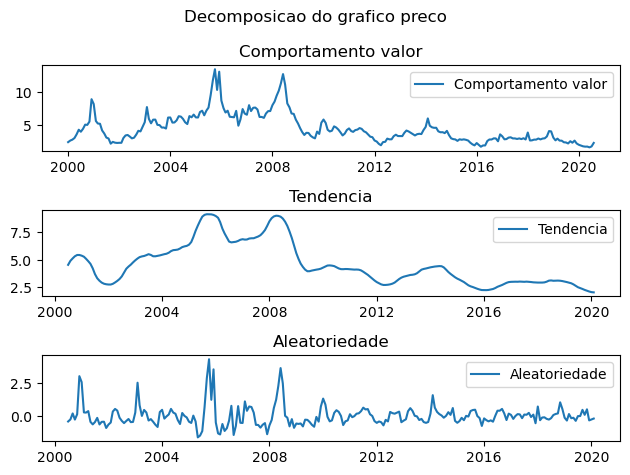

In [ ]:
fig=plt.figure()
fig.subplots_adjust(hspace=0.4, top=0.85)
fig.suptitle("Decomposicao do grafico preco")
ax1 = fig.add_subplot(3,1,1)
plt.plot(df, label="Comportamento valor")
plt.legend(loc="best")
ax1.title.set_text("Comportamento valor")
ax2 = fig.add_subplot(3,1,2)
plt.plot(trend, label="Tendencia")
plt.legend(loc="best")
ax2.title.set_text("Tendencia")
ax3 = fig.add_subplot(3,1,3)
plt.plot(resid, label="Aleatoriedade")
plt.legend(loc="best")
ax3.title.set_text("Aleatoriedade")

plt.tight_layout()

Como mostrado os valores descrito no teste ADF, e o p-value, a serie NAO é estacionária e isso  tambem é evidênciado no gráfico de decomposição  acima. E o p-value, nos dois testes realizados está elevado com valor de  0.322 e 3.217, e isso  indica  que podemos REJEITAR a hipotese nula e  que a serie é estacionaria.

In [ ]:
result=adfuller(df["Price"].dropna())
print(f"Teste ADF: {result[0]}")
print(f"Teste p-value: {result[1]}")

Teste ADF: -1.9199962977117597
Teste p-value: 0.3227134775174372


O modelo mais ajustado aos dados é o Sarimax. O teste de AIC Sarimax = 616.125 e AIC ARIMA = 641.685 avalia a qualidade dos modelos e o menor valor indica o melhor ajuste do modelo aos dados analisados.


In [ ]:
result=adfuller(df["Price"].diff().dropna())
print(f"Teste ADF: {result[0]}")
print(f"Teste p-value: {result[1]}")

Teste ADF: -7.1467546954607775
Teste p-value: 3.217864737854518e-10


In [ ]:
step_wise=auto_arima(df, d=1, start_p=1, start_q=1, max_p=3,max_q=3,
                     seasonal=True, m=18, D=1, start_P=1,
                     start_Q=1, max_P=2, max_Q=2, information_criterion="aic",
                     trace=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[18]             : AIC=692.399, Time=3.72 sec
 ARIMA(0,1,0)(0,1,1)[18]             : AIC=inf, Time=0.55 sec
 ARIMA(0,1,0)(0,1,2)[18]             : AIC=inf, Time=2.02 sec
 ARIMA(0,1,0)(1,1,0)[18]             : AIC=640.964, Time=0.25 sec
 ARIMA(0,1,0)(1,1,1)[18]             : AIC=inf, Time=1.67 sec
 ARIMA(0,1,0)(1,1,2)[18]             : AIC=inf, Time=12.00 sec
 ARIMA(0,1,0)(2,1,0)[18]             : AIC=616.125, Time=0.58 sec
 ARIMA(0,1,0)(2,1,1)[18]             : AIC=inf, Time=2.13 sec
 ARIMA(0,1,0)(2,1,2)[18]             : AIC=inf, Time=9.10 sec
 ARIMA(0,1,1)(0,1,0)[18]             : AIC=693.192, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[18]             : AIC=inf, Time=1.25 sec
 ARIMA(0,1,1)(0,1,2)[18]             : AIC=inf, Time=4.70 sec
 ARIMA(0,1,1)(1,1,0)[18]             : AIC=642.796, Time=0.60 sec
 ARIMA(0,1,1)(1,1,1)[18]             : AIC=inf, Time=3.04 sec
 ARIMA(0,1,1)(1,1,2)[18]             : AIC=inf, Time=10.74 sec
 ARIMA(0,1,1)(2,1,0)[18]             : AIC=618.0

In [ ]:
print(step_wise.aic())

615.8323385144284


In [ ]:
df.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01'],
              dtype='datetime64[ns]', name='Month', length=248, freq=None)

In [ ]:
train=df['2010-01-01':"2018-12-01"]
test=df["2019-01-01":]

In [ ]:
len(test)

20

In [ ]:
step_wise.fit(train)

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(2, 1, 0, 18),
      suppress_warnings=True, with_intercept=False)

In [ ]:
predict=step_wise.predict(n_periods=30)

In [ ]:
predict

2019-01-01    3.974826
2019-02-01    3.799640
2019-03-01    3.827565
2019-04-01    3.741208
2019-05-01    3.936400
2019-06-01    3.733611
2019-07-01    4.144277
2019-08-01    3.500824
2019-09-01    3.534301
2019-10-01    3.509035
2019-11-01    3.517392
2019-12-01    3.756810
2020-01-01    3.659208
2020-02-01    3.619905
2020-03-01    3.610356
2020-04-01    3.680818
2020-05-01    4.009708
2020-06-01    3.901703
2020-07-01    3.985381
2020-08-01    3.788486
2020-09-01    3.730980
2020-10-01    3.733034
2020-11-01    3.852737
2020-12-01    3.939688
2021-01-01    4.402594
2021-02-01    3.873934
2021-03-01    3.950146
2021-04-01    3.953465
2021-05-01    3.815925
2021-06-01    4.307067
Freq: MS, dtype: float64

(array([17897., 17956., 18017., 18078., 18140., 18201., 18262., 18322.,
        18383., 18444.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

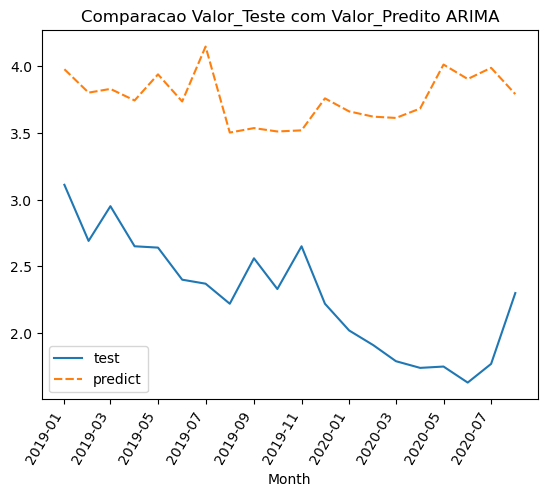

In [ ]:
tabela=pd.DataFrame()
tabela["test"]=test
tabela["predict"]=predict
sns.lineplot(tabela).set(title="Comparacao Valor_Teste com Valor_Predito ARIMA")
plt.xticks(rotation=60, ha="right")

In [ ]:
tabela

,test,predict
Month,,
2019-01-01,3.11,3.974826
2019-02-01,2.69,3.799640
2019-03-01,2.95,3.827565
2019-04-01,2.65,3.741208
2019-05-01,2.64,3.936400
2019-06-01,2.40,3.733611
2019-07-01,2.37,4.144277
2019-08-01,2.22,3.500824
2019-09-01,2.56,3.534301


# Teste do modelo SARIMAX

In [ ]:
modelo=SARIMAX(df,order=(0,1,0), seasonal_order=(2,1,0,18 ))
resultado_sarimax=modelo.fit()

/Users/chenyenpin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/chenyenpin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23012D+00    |proj g|=  7.37361D-03


 This problem is unconstrained.



At iterate    5    f=  1.23009D+00    |proj g|=  1.88045D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   2.899D-06   1.230D+00
  F =   1.2300905545477245     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [ ]:
resultado_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                  248
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 18)   Log Likelihood                -305.062
Date:                            Wed, 14 Jun 2023   AIC                            616.125
Time:                                    23:31:46   BIC                            626.426
Sample:                                01-01-2000   HQIC                           620.281
                                     - 08-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L18      -0.6286      0.057    -10.940      0.000      -0.741      -0.516
ar.S.L36      -0.3389      0.048     -7.103      0.000      -0.432      -0.245
sigma2         0.8087      0.045     17.818      0.000       0.720       0.898
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               177.62
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                            -0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predicao=resultado_sarimax.get_prediction(start=-12)
predicao_media=predicao.predicted_mean
int_conf=predicao.conf_int()


In [ ]:
limite_baixo_pred=int_conf.iloc[:,0]
limite_alto_pred=int_conf.iloc[:,1]
display(limite_baixo_pred[1], limite_alto_pred[1],predicao_media[1], df)

0.7608615287440026

4.285957146708915

2.523409337726459

,Price
Month,
2000-01-01,2.42
2000-02-01,2.66
2000-03-01,2.79
2000-04-01,3.04
2000-05-01,3.59
...,...
2020-04-01,1.74
2020-05-01,1.75
2020-06-01,1.63


In [ ]:
date_pred=np.asarray(predicao_media.index)
date=np.asarray(df.index)
date

array(['2000-01-01T00:00:00.000000000', '2000-02-01T00:00:00.000000000',
       '2000-03-01T00:00:00.000000000', '2000-04-01T00:00:00.000000000',
       '2000-05-01T00:00:00.000000000', '2000-06-01T00:00:00.000000000',
       '2000-07-01T00:00:00.000000000', '2000-08-01T00:00:00.000000000',
       '2000-09-01T00:00:00.000000000', '2000-10-01T00:00:00.000000000',
       '2000-11-01T00:00:00.000000000', '2000-12-01T00:00:00.000000000',
       '2001-01-01T00:00:00.000000000', '2001-02-01T00:00:00.000000000',
       '2001-03-01T00:00:00.000000000', '2001-04-01T00:00:00.000000000',
       '2001-05-01T00:00:00.000000000', '2001-06-01T00:00:00.000000000',
       '2001-07-01T00:00:00.000000000', '2001-08-01T00:00:00.000000000',
       '2001-09-01T00:00:00.000000000', '2001-10-01T00:00:00.000000000',
       '2001-11-01T00:00:00.000000000', '2001-12-01T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2002-02-01T00:00:00.000000000',
       '2002-03-01T00:00:00.000000000', '2002-04-01

# Avaliando Modelo e plotando o o grafico de predicao e variacao do preco no periodo

In [ ]:
mae=mean_absolute_error(df[-12:], predicao_media.values)
mse = mean_squared_error(df[-12:], predicao_media.values)
rmse = np.sqrt(mse)
print(f"Mae: {mae}")
print(f"RMSE: {rmse}")
print(f"MSE:{mse}")

Mae: 0.27710480002191124
RMSE: 0.37827502193920576
MSE:0.1430919922231066


Text(0.5, 1.0, 'Variacao de preco x Valor Pre')

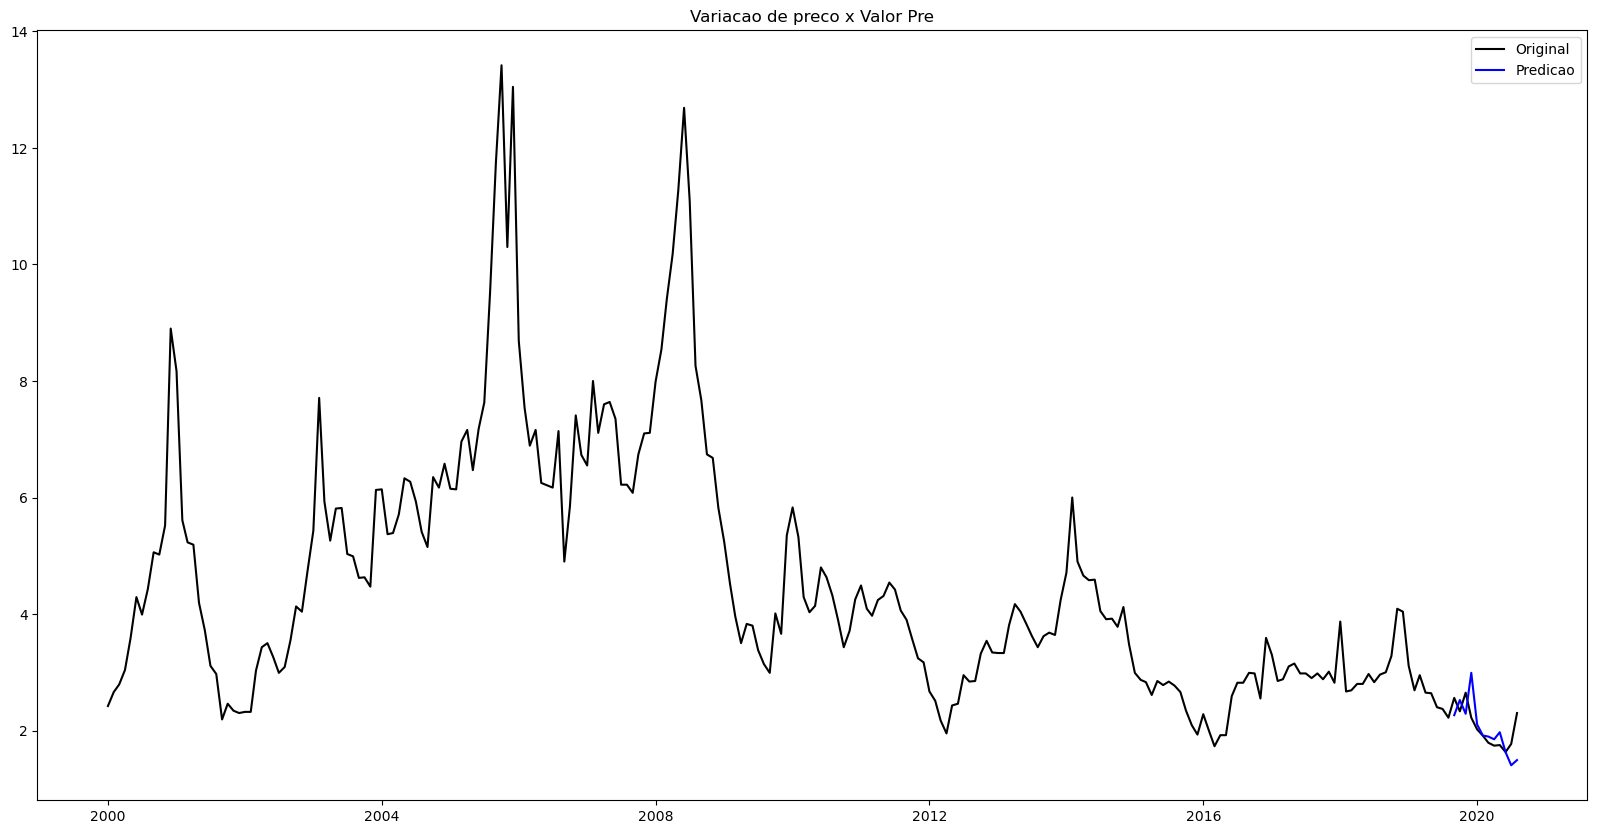

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(date, df, label="Original", color="black")
plt.plot(date_pred, predicao_media.values, label="Predicao", color="blue")
plt.legend(loc="best")
plt.title("Variacao de preco x Valor Preco")


# Fazendo o forecasting para 18 meses a frente

In [ ]:
forecast=resultado_sarimax.get_forecast(steps=18)
forecast_mean=forecast.predicted_mean
forecast_mean


2020-09-01    2.331643
2020-10-01    2.255629
2020-11-01    2.289583
2020-12-01    2.372425
2021-01-01    2.743454
2021-02-01    2.340046
2021-03-01    2.529722
2021-04-01    2.472784
2021-05-01    2.445926
2021-06-01    2.687886
2021-07-01    2.474774
2021-08-01    2.319104
2021-09-01    2.296292
2021-10-01    2.433398
2021-11-01    2.688751
2021-12-01    2.572091
2022-01-01    2.354621
2022-02-01    2.402661
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
forecast_conf=forecast.conf_int()
forecast_conf
limite_abaixo_fore=forecast_conf.iloc[:,0]
limite_acima_fore=forecast_conf.iloc[:,1]
forecast_mean[1], limite_abaixo_fore[1], limite_acima_fore[1]

(2.255629429502432, -0.23698958627901368, 4.748248445283878)

In [ ]:
date_fore=np.asarray(forecast_mean.index)

# Plotando o grafico com os oscilacao de valores durante o periodo a predicao do valores e a previsao da mesma

Text(0.5, 1.0, 'Variacao de preco x preco predito x previsao de preco')

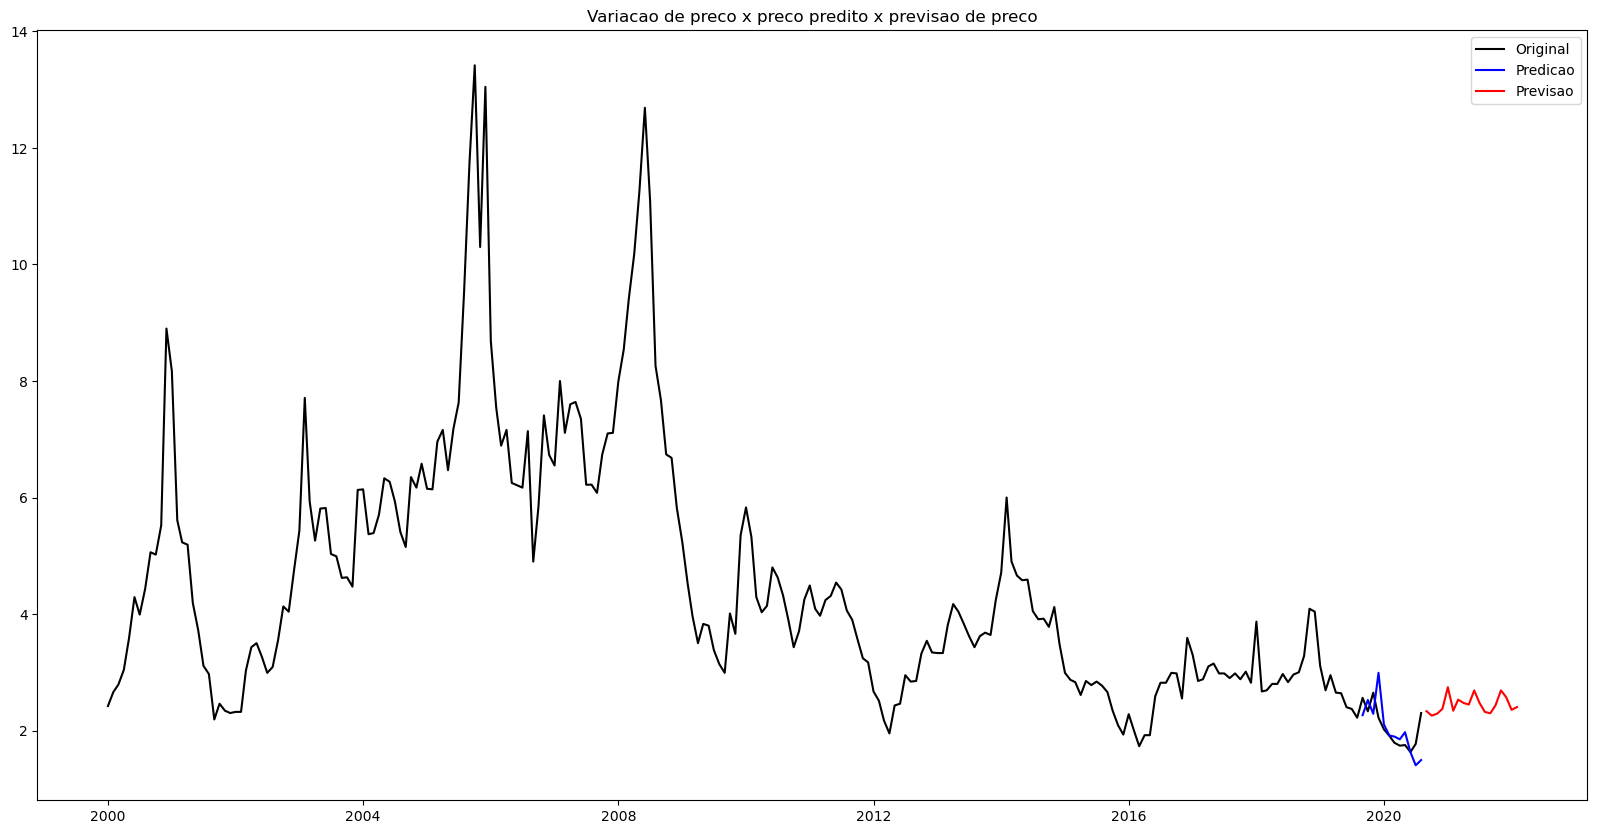

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(date, df, label="Original", color="black")
plt.plot(date_pred, predicao_media.values, label="Predicao", color="blue")
plt.plot(date_fore, forecast_mean.values, label="Previsao", color="red")
plt.legend(loc="best")
plt.title("Variacao de preco x preco predito x previsao de preco")